In [1]:
dir_raiz = '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/Datasets/'

In [2]:
semilla = 54321

In [3]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
from datetime import datetime

In [5]:
import csv
feature_nams = list(csv.reader(open(dir_raiz+'features.csv','r'), delimiter=','))[0]

In [6]:
# Desicion Tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Clasificadores Uno Vs. Resto
from sklearn.multiclass import OneVsRestClassifier

In [7]:
# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

In [8]:
import csv
feature_nams = list(csv.reader(open(dir_raiz+'features.csv','r'), delimiter=','))[0]

In [9]:
X_train = pd.read_csv( dir_raiz + 'completo/train/X.csv', header=None)
y_train = pd.read_csv( dir_raiz + 'completo/train/y.csv', header=None)[0].map(str)

In [10]:
X_test = pd.read_csv( dir_raiz + 'completo/test/X.csv', header=None)
y_test = pd.read_csv( dir_raiz + 'completo/test/y.csv', header=None)[0].map(str)

In [11]:
X_train.shape

(12929043, 19)

In [12]:
X_test.shape

(3233956, 19)

In [13]:
y_train.shape

(12929043,)

In [14]:
y_test.shape

(3233956,)

In [15]:
clf = OneVsRestClassifier(DecisionTreeClassifier())

print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )
clf.fit(X_train, y_train)
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )

10/07/2023 05:39:29
10/07/2023 05:54:04


In [16]:
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )
y_pred = clf.predict(X_test)
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )

10/07/2023 05:54:04
10/07/2023 05:54:08


In [17]:
metrics.accuracy_score(y_test, y_pred)

0.8407387113491959

In [18]:
con_mat = metrics.confusion_matrix(y_test, y_pred)

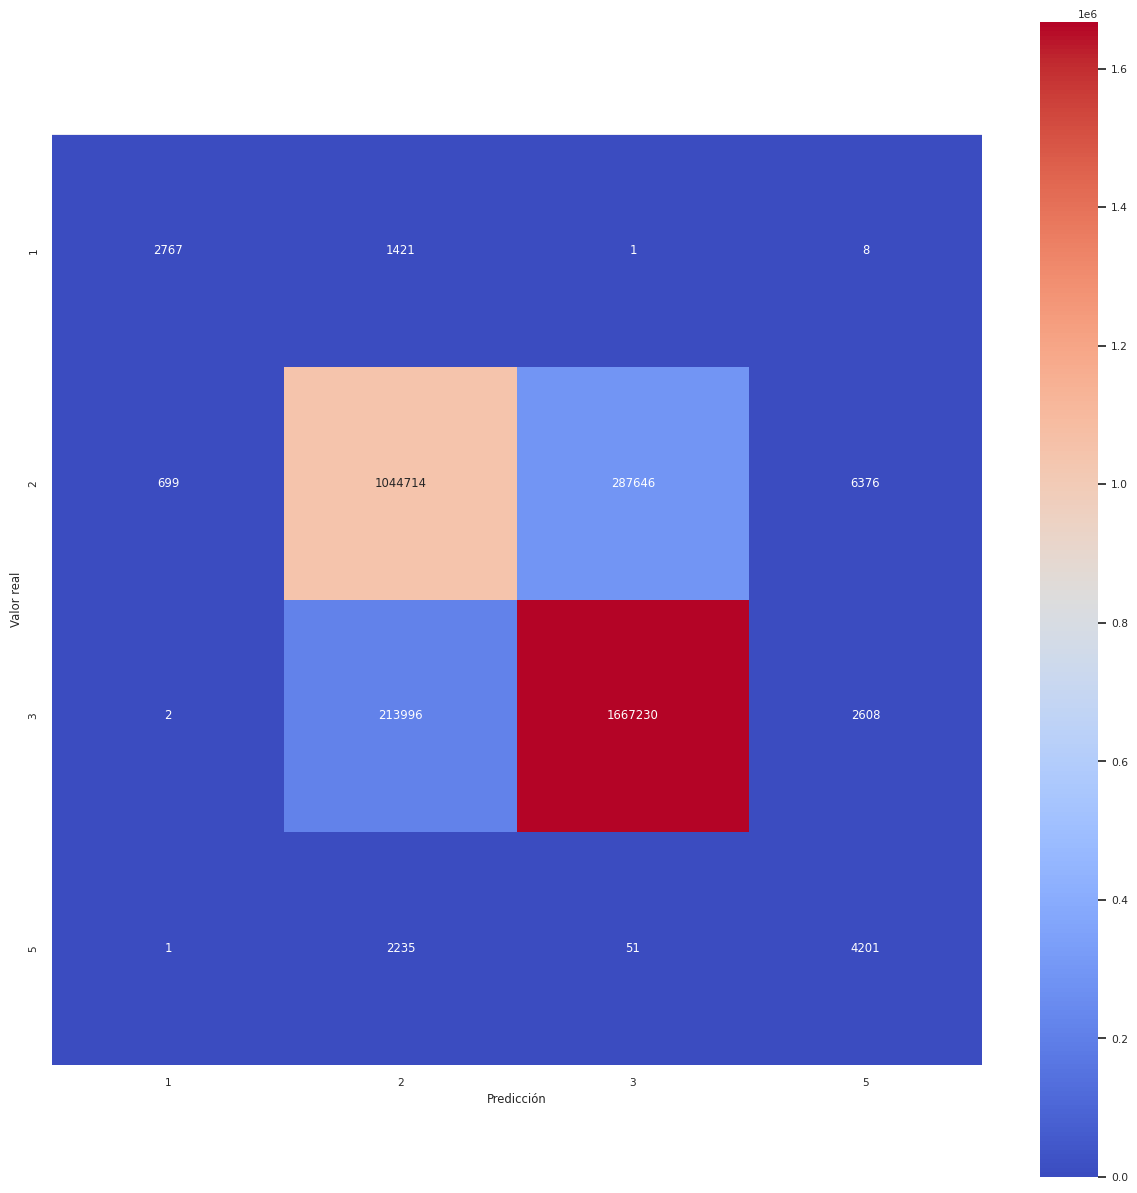

In [19]:
sns.set(rc={'figure.figsize':(15,15)}, font_scale=0.7)
y_labels=clf.classes_
sns.heatmap(con_mat, vmin=0, square=True, annot=True, cbar=True, cmap='coolwarm',xticklabels=y_labels, yticklabels=y_labels, fmt='.10g')
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

In [20]:
%%capture
metricas_x_cob = metrics.classification_report(y_test, y_pred)
print(metricas_x_cob)

In [21]:
print(metricas_x_cob)

              precision    recall  f1-score   support

           1       0.80      0.66      0.72      4197
           2       0.83      0.78      0.80   1339435
           3       0.85      0.89      0.87   1883836
           5       0.32      0.65      0.43      6488

    accuracy                           0.84   3233956
   macro avg       0.70      0.74      0.71   3233956
weighted avg       0.84      0.84      0.84   3233956



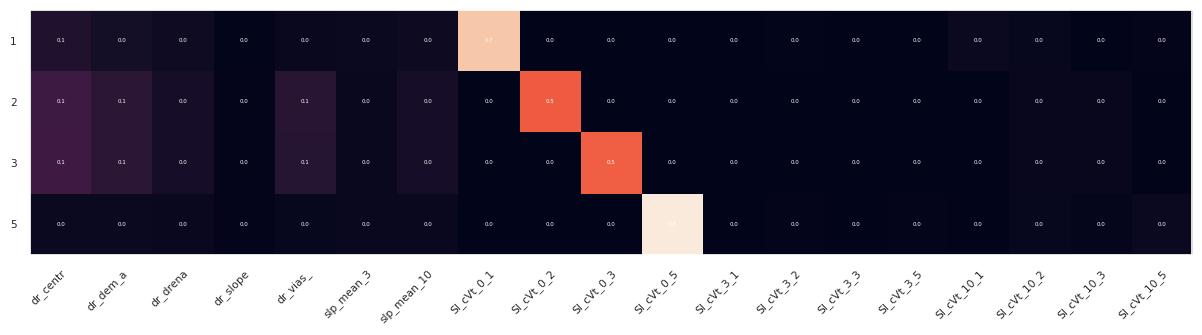

In [22]:
feat_imp = pd.DataFrame([clf.estimators_[i].feature_importances_ for i in range(len(clf.classes_))], columns=feature_nams, index=clf.classes_)

fig, ax = plt.subplots()
im = ax.imshow(feat_imp)
plt.grid(None)

ax.set_xticks(np.arange(len(feature_nams)), labels=feature_nams)
ax.set_yticks(np.arange(len(clf.classes_)), labels=clf.classes_)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(clf.classes_)):
  for j in range(len(feature_nams)):
    text = ax.text( j, i, round(feat_imp.to_numpy()[i,j],1), ha="center", va="center", color="w", size=4)

plt.show()

In [23]:
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )
plt.figure(figsize=(50,40))
_ = plot_tree(clf.estimators_[0], feature_names=feature_nams, filled=True)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )

10/07/2023 06:06:37
